In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

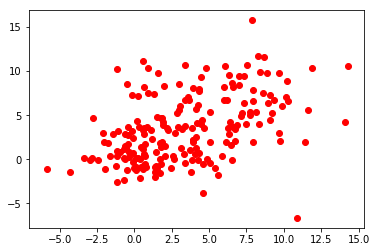

In [149]:
# We create some data
d1 = np.random.normal(loc=6, scale=3.5, size=200).reshape(100, 2)
d2 = np.random.normal(loc=1, scale=2, size=200).reshape(100, 2)

plt.scatter(d1[:,0], d1[:,1], c="r")
plt.scatter(d2[:,0], d2[:,1], c="r")

In [150]:
# We place all data in a single matrix
data = np.concatenate([d1, d2])

In [151]:
data.shape, data

((200, 2), array([[ 4.18875166e+00,  4.11735079e+00],
        [ 2.07812131e+00,  1.47246353e+00],
        [ 8.85851429e+00,  9.74987593e+00],
        [ 1.08507233e+01, -6.65124831e+00],
        [ 9.65149720e+00,  9.82968325e+00],
        [ 1.02580372e+01,  6.63029432e+00],
        [ 7.16915030e+00,  5.29015075e+00],
        [ 5.04332463e+00,  5.33812668e+00],
        [ 9.21097513e+00,  5.23992715e+00],
        [ 1.18705024e+01,  1.03611937e+01],
        [ 7.49453898e+00,  4.04215566e+00],
        [ 1.51021903e+00, -1.00225845e+00],
        [ 3.67089186e+00,  6.71230843e+00],
        [ 2.00305992e+00,  8.34574794e+00],
        [ 6.35028064e+00,  2.88871278e+00],
        [ 1.90997823e+00,  4.27821912e+00],
        [ 6.54232702e+00, -7.52393271e-02],
        [ 1.53419352e+00,  4.78126773e+00],
        [ 5.51664300e-01,  1.11446035e+01],
        [ 9.88213314e+00,  6.01804378e+00],
        [ 7.53771834e+00,  1.06914105e+01],
        [ 6.61603147e+00,  3.63910007e+00],
        [-1.15858929e+

In [155]:
# We define our training function
def kmeans_train(dataset, k=2, threshold=1e-3):
    # Generate random centers
    minimum = np.min(dataset, axis=0)
    maximum = np.max(dataset, axis=0)
    
    centers = np.column_stack([ np.linspace(minimum[i], maximum[i], k) for i in range(minimum.shape[0]) ])
    
    # Improve centers
    error = 2*threshold
    while error > threshold:
        nearest = np.zeros(dataset.shape[0])
        
        # Find nearest neighbors to the centroids
        for i in range(dataset.shape[0]):
            point = dataset[i]
            distances = np.sqrt(np.sum( (centers - point)**2, axis=1 ))
            nearest[i] = np.argmin(distances)
            
        # Get new centroids
        newCenters = np.copy(centers)
        for i in range(centers.shape[0]):
            points = dataset[np.argwhere(nearest == i)[:,0]]
            newCenters[i] = np.mean(points, axis=0)
            
        # Calculate error
        error = np.sum(np.abs(centers - newCenters)) / centers.size
        centers = newCenters
        print(error)
    
    return centers
    
centers = kmeans_train(data, k=4)
print(centers)

1.915584799477521
0.7687495662142114
0.5064517156806829
0.4333030516981885
0.31642198106938435
0.2695254262177842
0.33684388751811173
0.28672398352324135
0.24510298838012573
0.14161560087299968
0.019413348883174884
0.0
[[-0.1439853   0.65546461]
 [ 4.82993788  1.50169247]
 [ 2.3223528   7.26875418]
 [ 8.57852503  7.48844113]]


In [156]:
# Now we define the prediction function
def kmeans_test(centers, query):
    distances = np.sqrt(np.sum((query - centers) ** 2, axis=1))
    return np.argmin(distances)

kmeans_test(centers, [10,10])

3

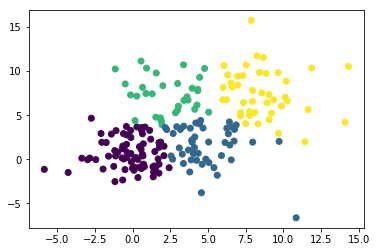

In [157]:
# We plot the classified points
colors = []
for i in data:
    colors.append(kmeans_test(centers, i))

plt.scatter(data[:,0], data[:,1], c=colors)